In [1]:
from OFDM import *
%matplotlib inline

In [2]:
# Create random bit stream, bits are length 10x OFDM symbol length - 0's

ofdm_symbol_size = 1024
cp_length = ofdm_symbol_size // 4
modulation = "QPSK"

no_bits = 100 * 511 * 2

bits = np.random.binomial(n=1, p=0.5, size=(no_bits, ))

In [3]:
tx = transmitter(ofdm_symbol_size, cp_length, "QPSK")

signal = tx.transmit(bits)


------------------------------------------
TRANSMIT
------------------------------------------


OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               256 
Modulation method:                  QPSK
Number of bits to transmit:         102200
Number of OFDM symbols to transmit: 100


In [4]:
#scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, fsweep)

#signal = play_record(tx, fs=tx.fs, padding_before = 1,padding_after=1)

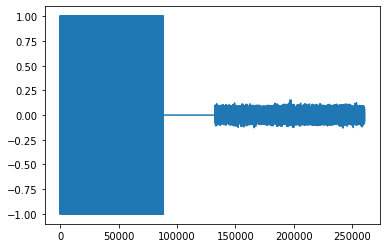

In [5]:
plt.plot(np.arange(len(signal)),signal)

In [6]:
rx = receiver(ofdm_symbol_size, cp_length, "QPSK")

rx_bits = rx.receive(signal)


------------------------------------------
 Receive 
------------------------------------------



In [9]:
errs = np.sum(abs(bits-rx_bits))
errs

0

(100, 1024)
511


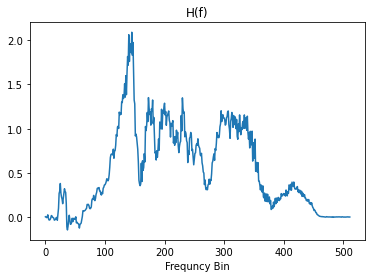

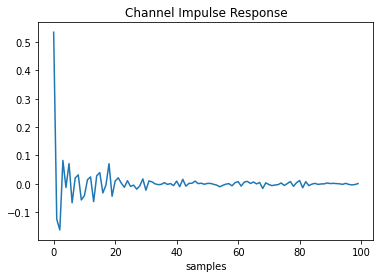

In [264]:
rx_p = rx.reshape(-1,prefix_length+ofdm_symbol_size)

rx_p_nocp = rx_p[:,prefix_length:]

print(rx_p_nocp.shape)
rx_symbols = FFT(rx_p_nocp)
rx_symbols = rx_symbols[:,1:no_data_carriers+1]

H = rx_symbols / QPSK


print(H.shape[1])

for i in range(0,H.shape[1]):
    avg.real[i] = np.mean(H[:,i].real)
    avg.imag[i] = np.mean(H[:,i].imag)

plt.plot(np.arange(0,len(avg)), avg.real)
plt.title("H(f)")
plt.xlabel("Frequncy Bin")
plt.savefig("plots/channe_freq_response.jpg")
plt.show()
plt.plot(np.arange(0,100),np.fft.ifft(avg).real[:100])
plt.title("Channel Impulse Response")
plt.xlabel("samples")
plt.savefig("plots/channel_impulse_response.jpg")
plt.show()
